# SVM

In [2]:
library(repr)
library(caTools)
options(repr.plot.width = 4, repr.plot.height = 4)
# SVM
library(e1071)
#Preprocessamento
library(CatEncoders)
library(gplots)
#Matricas
library(caret)

## Carregando os dados

In [3]:
df <- read.csv("../datasets/titanic/train.csv", na.strings = '')
head(df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


## Pré-Processamento de Dados

In [5]:
# Extração de Pronomes
df$Name <- ifelse(grepl(", Mr. ", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Capt", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Don", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Major", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Col", df$Name), 'Tripulacao', as.character(df$Name))
df$Name <- ifelse(grepl("Dr", df$Name), 'Dr', as.character(df$Name))
df$Name <- ifelse(grepl("Rev", df$Name), 'Rev', as.character(df$Name))
df$Name <- ifelse(grepl("Sir", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Jonkheer", df$Name), 'Mr', as.character(df$Name))
df$Name <- ifelse(grepl("Dona", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Countess", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mme", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Lady", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mrs", df$Name), 'Mrs', as.character(df$Name))
df$Name <- ifelse(grepl("Mlle", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Ms", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Miss", df$Name), 'Miss', as.character(df$Name))
df$Name <- ifelse(grepl("Master", df$Name), 'Master', as.character(df$Name))

# Categóricas para Numéricas
le_name <- LabelEncoder.fit(unique(df$Name))
df$Name <- transform(le_name, df$Name)

# Substituir valores ausentes/nulos
media <- mean(df$Age, na.rm = TRUE)
df$Age <- ifelse(is.na(df$Age), media, df$Age)

t <- table(df$Embarked)
moda <- names(t[t == max(t)])

df$Embarked <- ifelse(is.na(df$Embarked), as.character(moda), as.character(df$Embarked) )

# Categórico Para numérico
le_sex <- LabelEncoder.fit(unique(df$Sex))
df$Sex <- transform(le_sex, df$Sex)

le_embarked <- LabelEncoder.fit(unique(df$Embarked))
df$Embarked <- transform(le_embarked, df$Embarked)

# Remoção de colunas
df$PassengerId <- NULL
df$Ticket <- NULL
df$Cabin <- NULL

#Escalonamento 
df[, c('Age', 'Fare')] <- scale(df[, c('Age', 'Fare')])

df$Survived = factor(df$Survived)

head(df)
str(df)

Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,4,2,-5.921480e-01,1,0,-0.5021631,3
1,1,5,1,6.384304e-01,1,0,0.7864036,1
1,3,3,1,-2.845034e-01,0,0,-0.4885799,3
1,1,5,1,4.076970e-01,1,0,0.4204941,3
0,3,4,2,4.076970e-01,0,0,-0.4860644,3
0,3,4,2,1.171279e-17,0,0,-0.4778481,2


'data.frame':	891 obs. of  9 variables:
 $ Survived: Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Pclass  : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name    : int  4 5 3 5 4 4 4 2 5 5 ...
 $ Sex     : int  2 1 1 1 2 2 2 2 1 1 ...
 $ Age     : num  -0.592 0.638 -0.285 0.408 0.408 ...
 $ SibSp   : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch   : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Fare    : num  -0.502 0.786 -0.489 0.42 -0.486 ...
 $ Embarked: int  3 1 3 3 3 2 3 3 3 1 ...


# Divisão dos dados em treino e teste

In [6]:
set.seed(0)
divisao <- sample.split(df$Survived, SplitRatio = 0.75)

treino <- subset(df, divisao == TRUE)
teste <-  subset(df, divisao == FALSE)

x_train <- treino[,-1]
y_train <- treino$Survived

x_test <- teste[,-1]
y_test <- teste$Survived

## SVM

Argumentos

- **x** - Uma matriz numérica ou um quadro de dados de variáveis  categóricas e/ou numéricas.
- **y** - Vetor de classe.
- **formula** - Uma fórmula da classe de formulário ~ x1 + x2 +…. Interações não são permitidas.
- **data** - Tanto um quadro de dados de preditores (categóricos e / ou numéricos) ou uma tabela de contingência.
- **type** - O svm pode ser usado como máquina de classificação, máquina de regressão ou para detecção de novidades. Dependendo se y é um fator ou não, a configuração padrão para o tipo é classificação C ou regressão eps, respectivamente, mas pode ser substituída definindo um valor explícito. As opções válidas são:
    - C-classification
    - nu-classification
    - one-classification (for novelty detection)
    - eps-regression
    - nu-regression
- **kernel** - o kernel usado no treinamento e na previsão. Você pode considerar alterar alguns dos parâmetros a seguir, dependendo do tipo de kernel. 
    -  linear: \(u'v\)
    - polynomial: \((\gamma u'v + coef0)^{degree}\)
    - radial basis: \(e^(-\gamma |u-v|^2)\)
    - sigmoid: \(tanh(\gamma u'v + coef0)\)
- **dgree** - Parâmetro necessário para kernel do tipo polinomial (padrão: 3)
- **gamma** - Parâmetro necessário para todos os kernels, exceto linear (padrão: 1 / (dimensão de dados))
- **coef0** - Parâmetro necessário para kernels do tipo polinomial e sigmóide (padrão: 0)
- **cost** - Custo de violação de restrições (padrão: 1) --- é a constante ‘C’ do termo de regularização na formulação de Lagrange.
- **nu** - Parâmetro necessário para nu-classificação, nu-regressão e uma classificação 
- **class.weights** - Um vetor nomeado de pesos para as diferentes classes, usado para tamanhos de classes assimétricas. Nem todos os níveis de fator devem ser fornecidos (peso padrão: 1). Todos os componentes devem ser nomeados. Especificar "inverso" escolherá os pesos inversamente proporcionais à distribuição da classe.
- **cachesize** - Memória cache em MB (padrão 40)
- **tolerace** - Tolerância do critério de rescisão (padrão: 0,001) 
- **epsilon** - Epsilon na função de perda insensível (padrão: 0,1)
- **shrinking** - Opção de usar a heurística de redução (padrão: TRUE)
- **cross** - Se um valor inteiro k> 0 for especificado, uma validação cruzada k-fold nos dados de treinamento é realizada para avaliar a qualidade do modelo: a taxa de precisão para classificação e o erro quadrático médio para regressão
- **fitted** - Lógico indicando se os valores ajustados devem ser calculados e incluídos no modelo ou não (padrão: TRUE)
- **probability** - Lógico, indicando se o modelo deve permitir previsões de probabilidade. 
- **subset** - Para dados fornecidos em um quadro de dados, um vetor de índice que especifica os casos a serem usados a amostra de treinamento. (NOTA: Se fornecido, este argumento deve ser nomeado.)
- **na.action** - Uma função para especificar a ação a ser executada se NAs forem encontrados. A ação padrão é não contá-los para o cálculo dos fatores de probabilidade. Uma alternativa é na.omit, que leva à rejeição de casos com valores ausentes em qualquer variável necessária. (NOTA: Se fornecido, este argumento deve ser nomeado.)


Atributos

- **SV** - Os vetores de suporte resultantes (possivelmente em escala).
- **index** - O índice dos vetores de suporte resultantes na matriz de dados. Observe que este índice se refere aos dados pré-processados (após o possível efeito de na.omit e subconjunto)
- **coefs** -  Os coeficientes correspondentes vezes os rótulos de treinamento.
- **rho** - A interceptação negativa.
- **sigma** -  No caso de um modelo de regressão probabilística, o parâmetro de escala da distribuição hipotética (média zero) laplace estimada por máxima verossimilhança.
- **probA, probB** - Vetores numéricos de comprimento k (k-1) / 2, k número de classes, contendo os parâmetros das distribuições logísticas ajustadas aos valores de decisão dos classificadores binários (1 / (1 + exp (a x + b))). 

In [7]:
classificador <- svm(x = x_train, y = y_train, type = 'C-classification')

## Atributos

In [8]:
head(classificador$coefs)

1.000000
1.000000
0.174412
1.000000
1.000000
1.000000


# Prever um valor

In [14]:
Pclass <- 1
Name <- 'Miss'
Sex <- 'female'
Age <- 5
SibSp <- 1
Parch <- 1
Fare <- 500
Embarked <- 'C'

data = data.frame(Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked)

#Tratando os Dados
# Categóricas para Numéricas
data$Name <- transform(le_name, as.character(data$Name))
data$Sex  <- transform(le_sex, as.numeric(data$Sex))
data$Embarked <- transform(le_embarked, as.character(data$Embarked))


data[, c('Age', 'Fare')] <- scale(data[, c('Age', 'Fare')])

#Classificando
previsao = predict(classificador, newdata = data, type = 'class')
previsao

factor(0)
Levels: 0 1

## Prever os dados de Teste

In [15]:
previsao = predict(classificador, newdata = x_test)

acuracia = 100 * sum(previsao == y_test)/length(y_test)

acuracia

[1] 80.71749

# Matriz de Confusão

- A função **table** realiza o agrupamento dos dados
- A função **confusionMatriz** da biblioteca **caret** também calcula a matriz de confusão + as métricas

In [16]:
matriz_confusao = table(y_test, previsao)
matriz_confusao

      previsao
y_test   0   1
     0 118  19
     1  24  62

In [17]:
matriz = confusionMatrix(factor(previsao), factor(y_test))
matriz

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 118  24
         1  19  62
                                          
               Accuracy : 0.8072          
                 95% CI : (0.7492, 0.8568)
    No Information Rate : 0.6143          
    P-Value [Acc > NIR] : 4.335e-10       
                                          
                  Kappa : 0.5886          
                                          
 Mcnemar's Test P-Value : 0.5419          
                                          
            Sensitivity : 0.8613          
            Specificity : 0.7209          
         Pos Pred Value : 0.8310          
         Neg Pred Value : 0.7654          
             Prevalence : 0.6143          
         Detection Rate : 0.5291          
   Detection Prevalence : 0.6368          
      Balanced Accuracy : 0.7911          
                                          
       'Positive' Class : 0               
                              

## Personalizando a Matriz de Confusão

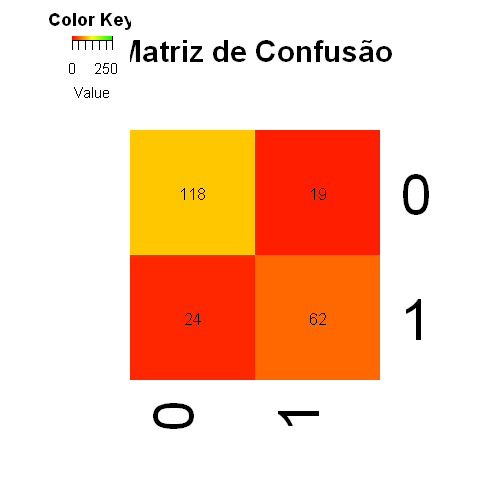

In [18]:
my_palette <- colorRampPalette(c("red", "yellow", "green"))

col_breaks = c(0:50, 51:100, 101:300)

heatmap.2(matriz_confusao,
    Rowv = 'NA',
    cellnote = matriz_confusao, 
    main = "Matriz de Confusão",
    notecol="black",      
    density.info="none",  
    trace="none",        
    col=my_palette,       
    breaks=col_breaks,   
    dendrogram= 'none',     
    Colv="NA" 
)

# Métricas

- **Precisão** que é a fração de instâncias recuperadas que são relevantes, 
- **Recall** - que é a fração de instâncias relevantes que são recuperadas 
- **f-score** - é 2 * precisão * recall / (precisão + recall) é 

In [19]:
precision(factor(previsao), factor(y_test))
'Morto'
precision(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
precision(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8309859

[1] "Morto"

[1] 0.7654321

[1] "Vivo"

[1] 0.8309859

In [20]:
recall(factor(previsao), factor(y_test))
'Morto'
recall(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
recall(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8613139

[1] "Morto"

[1] 0.7209302

[1] "Vivo"

[1] 0.8613139

In [21]:
F_meas(factor(previsao), factor(y_test))
'Morto'
F_meas(factor(previsao), factor(y_test), relevant = 2)
'Vivo'
F_meas(factor(previsao), factor(y_test), relevant = 1)

[1] 0.8458781

[1] "Morto"

[1] 0.742515

[1] "Vivo"

[1] 0.8458781

# Validação Cruzada

- **method = cv** - indica que iremos usar o método crossvalidation
- **number = 10** - define o número de fold
- **method = svmLinear2** - indica que iremos usar o algorítmo SVM

In [23]:
controle_treinamento = trainControl(method = 'cv', number = 10)
df$Survived = factor(df$Survived)
modelo = train(Survived ~ ., data = df, trControl = controle_treinamento, method = 'svmLinear2')
modelo$results

cost,Accuracy,Kappa,AccuracySD,KappaSD
0.25,0.7867734,0.5419641,0.04050521,0.08785687
0.50,0.7867734,0.5419641,0.04050521,0.08785687
1.00,0.7867734,0.5419641,0.04050521,0.08785687
